In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Change directory
%cd 'drive/My Drive/results/synthetic_init/'

/content/drive/My Drive/results/synthetic_init


In [3]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main

     / 45.6 MB 15.2 MB/s
  Created wheel for gradient-correction: filename=gradient_correction-0.1-py3-none-any.whl size=9958 sha256=ec1452f83838871e1db82b60c7c1b43f00fa576810051c846fbdd5c00ebe491e
  Stored in directory: /tmp/pip-ephem-wheel-cache-glnjjjh2/wheels/03/4c/0a/9516d8fa386ed9a21d1aa50e8cc5b1f6d6f576195897b24409
Successfully built gradient-correction


In [4]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [5]:
import pickle
file_cnn_deep_relu = open("cnn_deep_relu_results.pickle", "rb")
file_cnn_deep_exp = open("cnn_deep_exponential_results.pickle", "rb")
file_cnn_shallow_relu = open("cnn_shallow_relu_results.pickle", "rb")
file_cnn_shallow_exp = open("cnn_shallow_exponential_results.pickle", "rb")

In [6]:
results={}

In [7]:
results['deep_relu'] = pickle.load(file_cnn_deep_relu)
results['deep_exp'] = pickle.load(file_cnn_deep_exp)
results['shallow_relu'] = pickle.load(file_cnn_shallow_relu)
results['shallow_exp'] = pickle.load(file_cnn_shallow_exp)

In [8]:
for keys in results['deep_relu']:
    print(keys)

auc
saliency


In [9]:
Performance={}
Performance['deep_relu'] = np.array(results['deep_relu']['auc'])
Performance['deep_exp'] = np.array(results['deep_exp']['auc'])
Performance['shallow_relu'] = np.array(results['shallow_relu']['auc'])
Performance['shallow_exp'] = np.array(results['shallow_exp']['auc'])
print(Performance['deep_relu'].shape)

(10,)


In [11]:
Angles={}
Angles['deep_relu']=np.array(results['deep_relu']['saliency']['angles_std'])
Angles['deep_exp']=np.array(results['deep_exp']['saliency']['angles_std'])
Angles['shallow_relu']=np.array(results['shallow_relu']['saliency']['angles_std'])
Angles['shallow_exp']=np.array(results['shallow_exp']['saliency']['angles_std'])


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
print(Angles)

{'deep_relu': array([11.594194 , 12.855367 , 12.67716  , 12.804082 , 15.6818695,
       11.127385 , 12.401594 , 11.85485  , 12.228646 , 15.729786 ],
      dtype=float32), 'deep_exp': array([15.521496 , 15.8450985, 13.3489065, 14.326412 , 18.043234 ,
       16.019209 , 12.856612 , 12.706382 , 14.096886 , 16.529142 ],
      dtype=float32), 'shallow_relu': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32), 'shallow_exp': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)}


# CNN-deep-relu

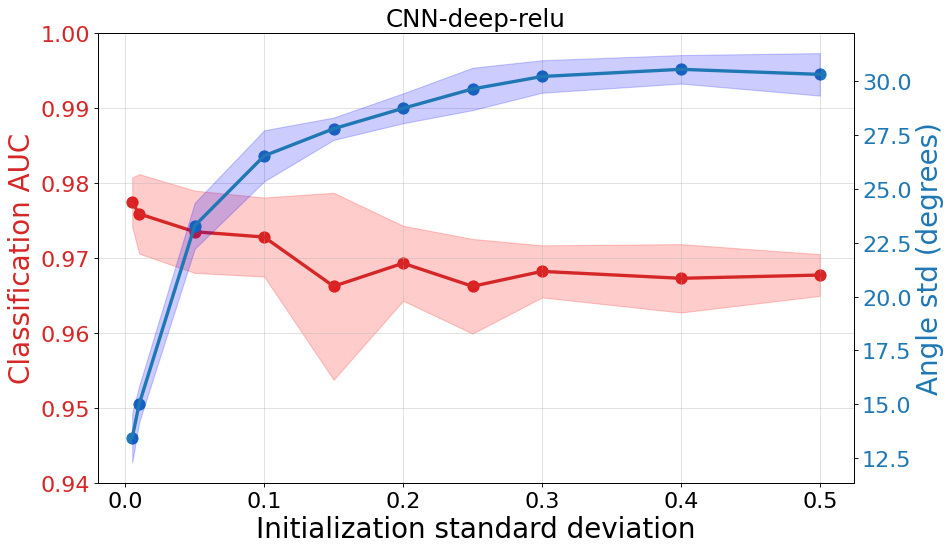

In [14]:
#CNN-deep-relu MEASUREMENTS
x = [0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
y1 = [0.977385879,	0.975845879,	0.973460376,	0.972756481,	0.966193831,	0.969264859,	0.966191173,	0.968178767,	0.967256445,	0.967690569]
y2 = [13.4443801,	15.0040533,	23.288477,	26.5384581,	27.7966209,	28.7459983,	29.6453104,	30.2235584,	30.5575072,	30.3226116]
y1errors = [0.00329961,	0.005298933,	0.005484404,	0.005272522,	0.012466105,	0.00499779,	0.006313082,	0.003472151,	0.004557165,	0.002783571]
y2errors = [1.14796265,	0.847146792,	1.068551975,	1.187178647,	0.519849928,	0.695600589,	0.98486642,	0.755919426,	0.661775351,	0.986964994]


# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(12,7), dpi= 80)
ax1.plot(x, y1, color='tab:red', linewidth=3.0)
ax1.scatter(x, y1, color='tab:red', s=100)
ax1.fill_between(x, np.array(y1)-np.array(y1errors), np.array(y1)+np.array(y1errors), color="r", alpha=0.2)
ax1.set_ylim(0.94,1)

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue', linewidth=3.0)
ax2.scatter(x, y2, color='tab:blue', s=100)
ax2.fill_between(x, np.array(y2)-np.array(y2errors), np.array(y2)+np.array(y2errors), color="b", alpha=0.2)


# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Initialization standard deviation', fontsize=25)
ax1.tick_params(axis='x', rotation=0, labelsize=20)
ax1.set_ylabel('Classification AUC', color='tab:red', fontsize=25)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' , labelsize=20)
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Angle std (degrees)", color='tab:blue', fontsize=25)
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=20)
ax2.set_title("CNN-deep-relu", fontsize=22)
fig.tight_layout()


plt.show()

# CNN-shallow-relu

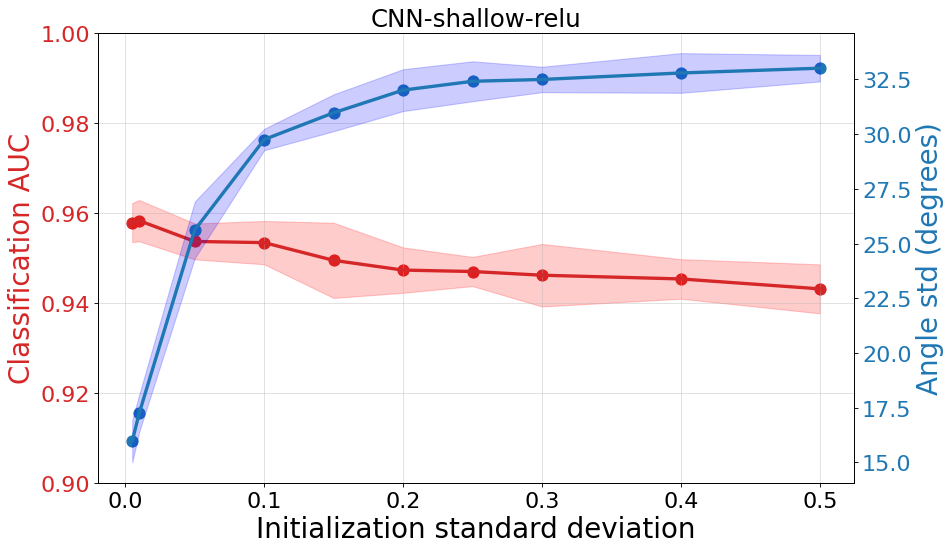

In [16]:
#CNN-shallow-relu MEASUREMENTS
x = [0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
y1 = [0.957808936,	0.95824104,	0.953616256,	0.953354681,	0.949413478,	0.947250986,	0.946935505,	0.946113449,	0.945286953,	0.943084741]
y2 = [15.9719889,	17.2437059,	25.6239158,	29.7531809,	30.975878,	32.0099636,	32.4141391,	32.4971593,	32.7941062,	33.0116204]
y1errors = [0.004357101,	0.004578092,	0.003988269,	0.004813586,	0.008351106,	0.005039053,	0.003243078,	0.006949387,	0.004396892,	0.005442975]
y2errors = [0.966756649,	0.851302164,	1.293041442,	0.488405223,	0.842920007,	0.955953289,	0.912840252,	0.58097429,	0.906562938,	0.605719752]


# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(12,7), dpi= 80)
ax1.plot(x, y1, color='tab:red', linewidth=3.0)
ax1.scatter(x, y1, color='tab:red', s=100)
ax1.fill_between(x, np.array(y1)-np.array(y1errors), np.array(y1)+np.array(y1errors), color="r", alpha=0.2)
ax1.set_ylim(0.90,1)

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue', linewidth=3.0)
ax2.scatter(x, y2, color='tab:blue', s=100)
ax2.fill_between(x, np.array(y2)-np.array(y2errors), np.array(y2)+np.array(y2errors), color="b", alpha=0.2)


# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Initialization standard deviation', fontsize=25)
ax1.tick_params(axis='x', rotation=0, labelsize=20)
ax1.set_ylabel('Classification AUC', color='tab:red', fontsize=25)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' , labelsize=20)
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Angle std (degrees)", color='tab:blue', fontsize=25)
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=20)
ax2.set_title("CNN-shallow-relu", fontsize=22)
fig.tight_layout()


plt.show()

# CNN-deep-exp

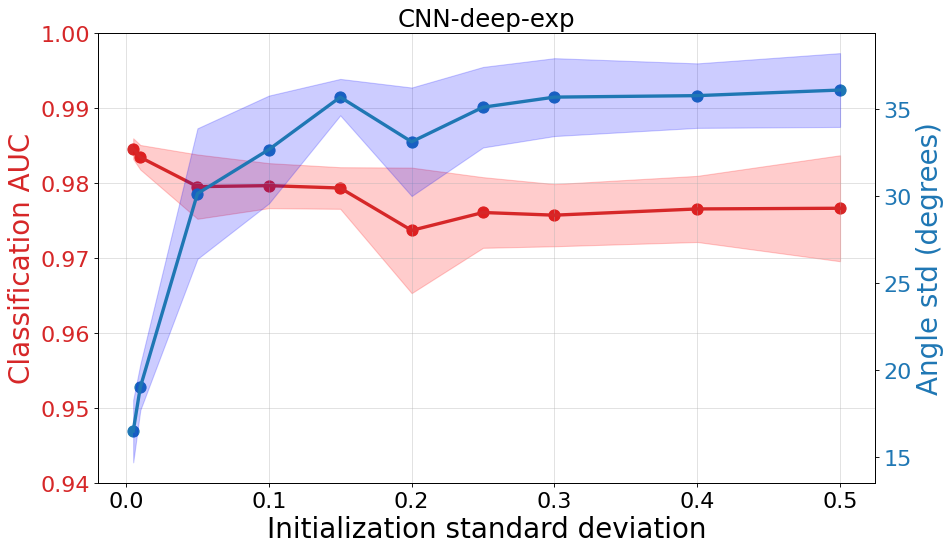

In [15]:
#CNN-deep-exp MEASUREMENTS
x = [0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
y1 = [0.984536362,	0.983387083,	0.979475796,	0.979608923,	0.979292452,	0.973644722,	0.976028568,	0.975671357,	0.976503724,	0.976593143]
y2 = [16.4961478,	19.0228494,	30.1323824,	32.6618309,	35.6709932,	33.1078042,	35.0929972,	35.6719801,	35.7570316,	36.0783778]
y1errors = [0.001382438,	0.001639416,	0.004285549,	0.003000942,	0.002773293,	0.008366461,	0.004708231,	0.004144206,	0.004408311,	0.007061593]
y2errors = [1.789812567,	1.311050324,	3.748168726,	3.096724594,	1.045541283,	3.114176718,	2.310827383,	2.235712843,	1.85155239,	2.118819679]


# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(12,7), dpi= 80)
ax1.plot(x, y1, color='tab:red', linewidth=3.0)
ax1.scatter(x, y1, color='tab:red', s=100)
ax1.fill_between(x, np.array(y1)-np.array(y1errors), np.array(y1)+np.array(y1errors), color="r", alpha=0.2)
ax1.set_ylim(0.94,1)

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue', linewidth=3.0)
ax2.scatter(x, y2, color='tab:blue', s=100)
ax2.fill_between(x, np.array(y2)-np.array(y2errors), np.array(y2)+np.array(y2errors), color="b", alpha=0.2)
#ax2.set_ylim(10,40)

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Initialization standard deviation', fontsize=25)
ax1.tick_params(axis='x', rotation=0, labelsize=20)
ax1.set_ylabel('Classification AUC', color='tab:red', fontsize=25)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' , labelsize=20)
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Angle std (degrees)", color='tab:blue', fontsize=25)
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=20)
ax2.set_title("CNN-deep-exp", fontsize=22)
fig.tight_layout()


plt.show()

# CNN-shallow-exp

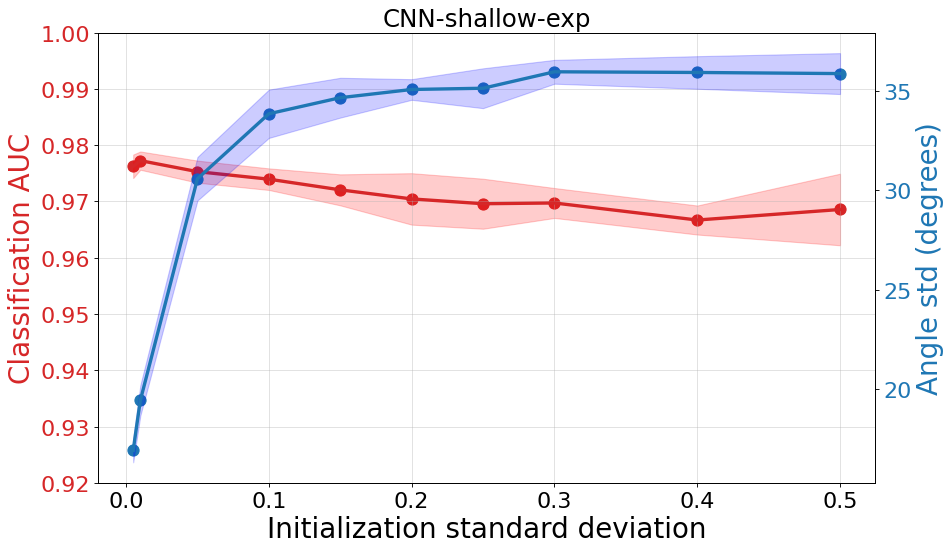

In [17]:
#CNN-shallow-exp MEASUREMENTS
x = [0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
y1 = [0.976244754,	0.977258927,	0.975298488,	0.973961371,	0.972063446,	0.970451826,	0.969597644,	0.969728482,	0.966699582,	0.968572628]
y2 = [16.921186,	19.4312907,	30.5752002,	33.8416041,	34.6494253,	35.0626874,	35.1252886,	35.9522025,	35.9180538,	35.8621153]
y1errors = [0.00208813,	0.001625372,	0.001962675,	0.00191866,	0.002756653,	0.004572745,	0.004446058,	0.002660308,	0.002578597,	0.006362548]
y2errors = [0.601094911,	0.76449325,	1.093259306,	1.214353221,	1.000542485,	0.51873713,	1.001977407,	0.599230399,	0.819367983,	1.028138891]


# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(12,7), dpi= 80)
ax1.plot(x, y1, color='tab:red', linewidth=3.0)
ax1.scatter(x, y1, color='tab:red', s=100)
ax1.fill_between(x, np.array(y1)-np.array(y1errors), np.array(y1)+np.array(y1errors), color="r", alpha=0.2)
ax1.set_ylim(0.92,1)

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue', linewidth=3.0)
ax2.scatter(x, y2, color='tab:blue', s=100)
ax2.fill_between(x, np.array(y2)-np.array(y2errors), np.array(y2)+np.array(y2errors), color="b", alpha=0.2)


# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Initialization standard deviation', fontsize=25)
ax1.tick_params(axis='x', rotation=0, labelsize=20)
ax1.set_ylabel('Classification AUC', color='tab:red', fontsize=25)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' , labelsize=20)
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Angle std (degrees)", color='tab:blue', fontsize=25)
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=20)
ax2.set_title("CNN-shallow-exp", fontsize=22)
fig.tight_layout()


plt.show()